In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [2]:
pd.options.mode.chained_assignment = None  # default='warn' i.e. statement to remove the warning.
pd.options.display.max_rows=100
pd.options.display.max_columns=75

In [3]:
# Read the Dataset

original_data=pd.read_table('C:/Users/ABHAYA/Documents/python/Python Project - Bank Lending/XYZCorp_LendingData.txt',
                            low_memory=False)

In [4]:
original_data.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2       NaN  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status   issue_d pymnt_plan  \
0     24000.0            Verified  Dec-2011          n   
1     30000.0     Source Verified  Dec-2011          n   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   
1    Borrower added on 12/22/11 > I plan to use t...          car      bike   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65          0.0         Jan-1985             1.0   
1    309xx         GA   1.00          0.0         Apr-1999             5.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0    13648.0        83.7        9.0                   f        0.0   
1     1687.0         9.4        4.0                   f        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5861.071414          5831.78          5000.00   
1            0.0  1008.710000          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0     Jan-2015           171.62          NaN           Jan-2016   
1     Apr-2013           119.66          NaN           Sep-2013   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN          1.0   
1                         0.0                          NaN          1.0   

  application_type  annual_inc_joint  dti_joint verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                       NaN   
1       INDIVIDUAL               NaN        NaN                       NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0             0.0           NaN          NaN          NaN         NaN   
1             0.0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   
1          NaN          NaN                 NaN           NaN      NaN   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          NaN          NaN         NaN       NaN               NaN     NaN   
1          NaN          NaN         NaN       NaN               NaN     NaN   

   total_cu_tl  inq_last_12m  default_ind  
0          NaN           NaN            0  
1          NaN           NaN            1

In [5]:
original_data.shape

(855969, 73)

#### Binning Continuous Features

In [6]:
# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
original_data['loan_amnt_range'] = pd.cut(original_data['funded_amnt'], bins, labels=bucket_l)

# create bins for int_rate range
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
original_data['int_rate_range'] = pd.cut(original_data['int_rate'], bins, labels=bucket_l)

# create bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
original_data['annual_inc_range'] = pd.cut(original_data['annual_inc'], bins, labels=bucket_l)

# create bins for installment range
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <=800:
        return 'high'
    else:
        return 'very high'

original_data['installment_Category'] = original_data['installment'].apply(lambda x: installment(x))

# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_l = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
original_data['dti_range'] = pd.cut(original_data['dti'], bins, labels=bucket_l)

#### Univariate Analysis

In [7]:
# function for plotting the count plot features wrt default ratio
def plotUnivariateRatioBar(feature, data=original_data, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["default_ind"]==1])
        feature_values.append(feature_count*100/feature_filter["default_ind"].count())
    plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
    plt.title("Loan Defaults wrt "+str(feature)+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
    plt.show()
    
# function to plot univariate with default status scale 0 - 1
def plotUnivariateBar(x, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='default_ind', data=original_data)
    plt.title("Loan Defaults wrt "+str(x)+" feature - countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

### A. Categorical Features

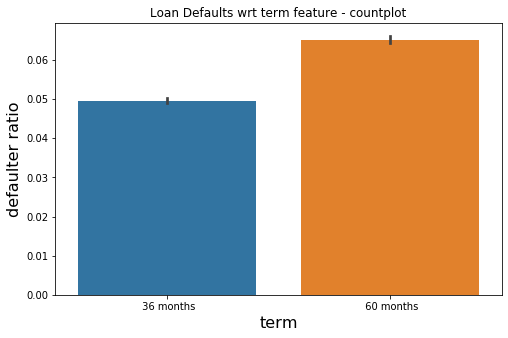

In [9]:
plotUnivariateBar("term", figsize=(8,5))

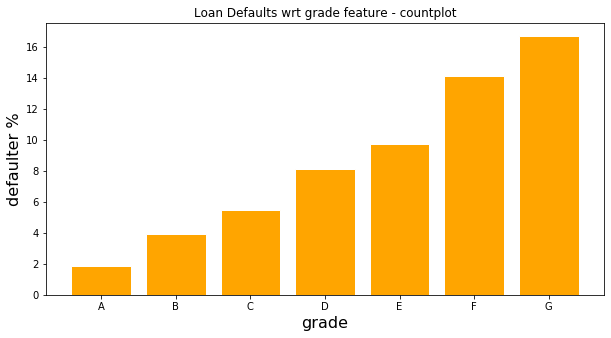

In [10]:
plotUnivariateRatioBar("grade")

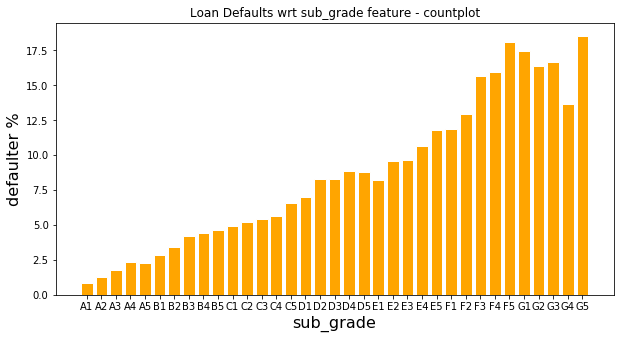

In [11]:
plotUnivariateRatioBar("sub_grade")

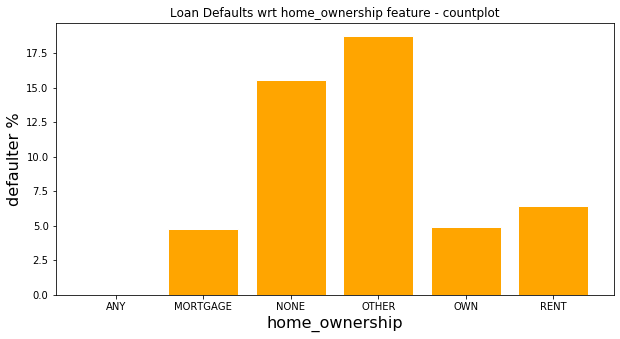

In [12]:
plotUnivariateRatioBar("home_ownership")

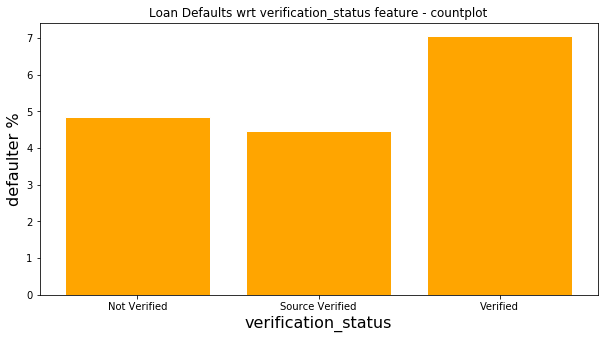

In [13]:
plotUnivariateRatioBar("verification_status")

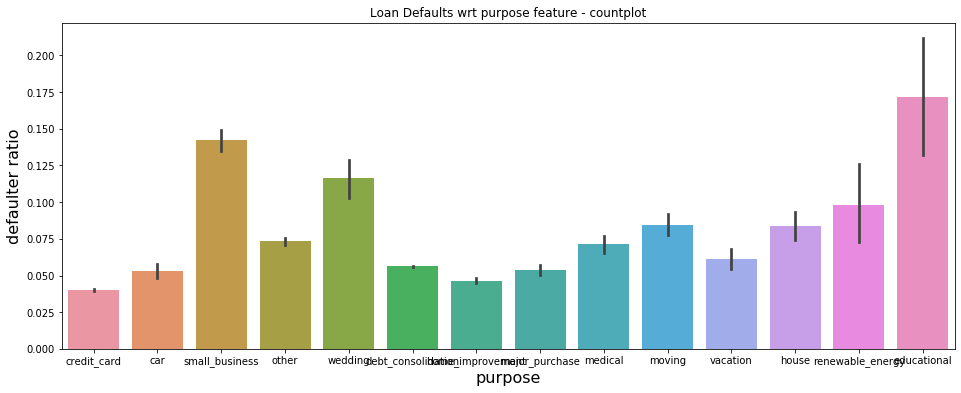

In [14]:
plotUnivariateBar("purpose", figsize=(16,6))

### B. Continuous Features

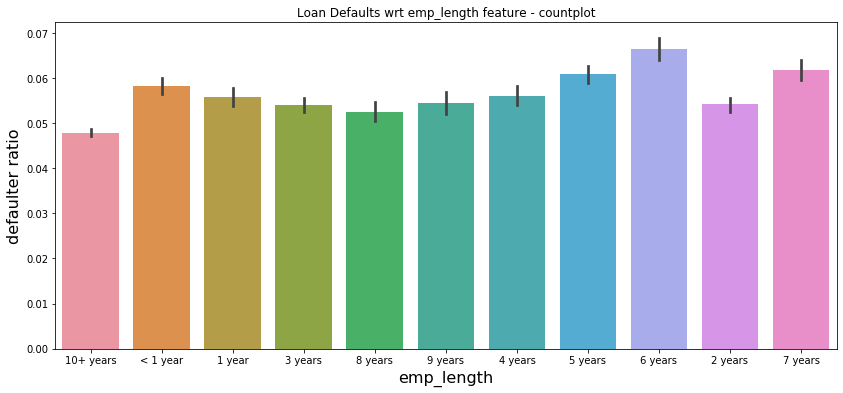

In [15]:
plotUnivariateBar("emp_length", figsize=(14,6))

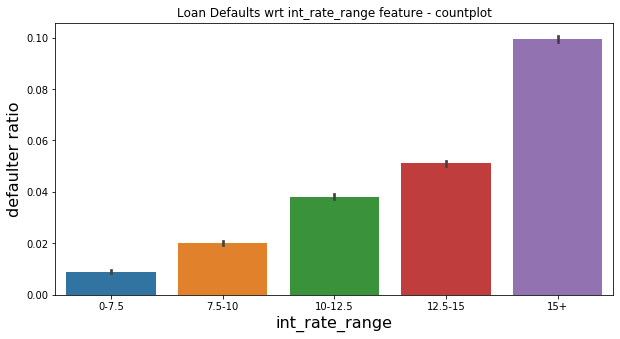

In [16]:
plotUnivariateBar("int_rate_range")

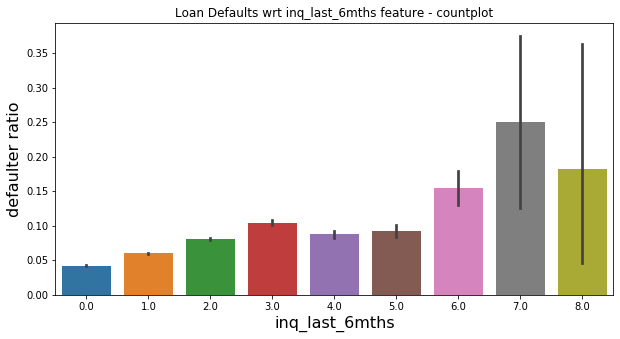

In [17]:
plotUnivariateBar("inq_last_6mths")

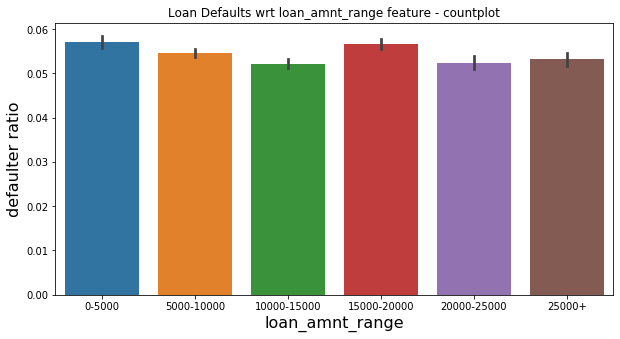

In [19]:
plotUnivariateBar("loan_amnt_range")

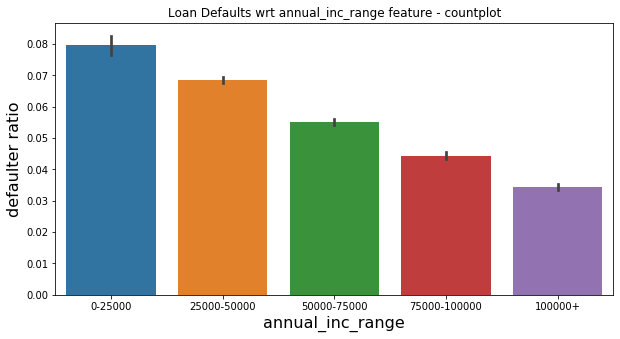

In [21]:
plotUnivariateBar("annual_inc_range")

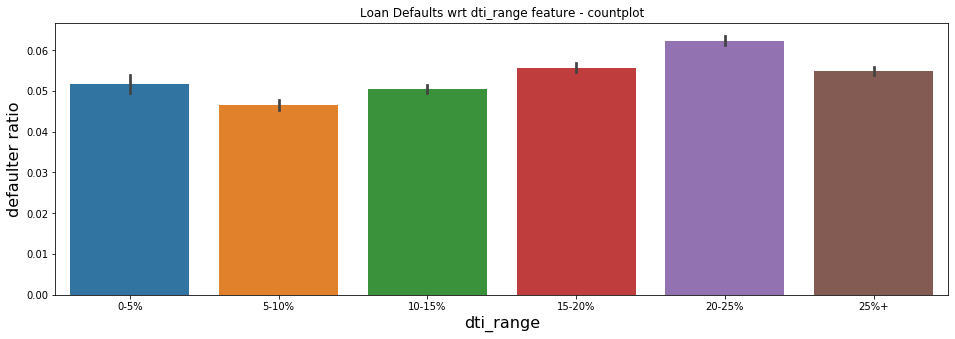

In [22]:
plotUnivariateBar("dti_range", figsize=(16,5))

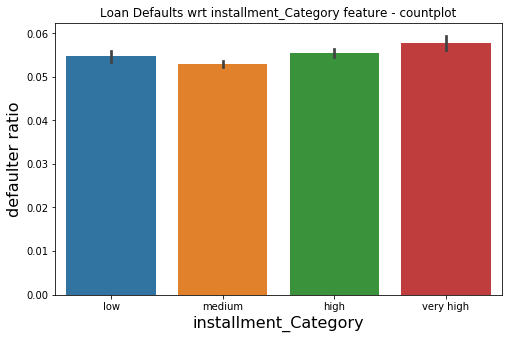

In [23]:
plotUnivariateBar("installment_Category", figsize=(8,5))

In [25]:
original_data.columns,original_data.shape

(Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
        'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
        'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
        'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
        'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
        'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
        'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
        'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
        'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
        'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
        'collections_12_mths_ex_med', 'mths_since_last_major_derog',
        'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
        'verification_status_joint', 'acc_now_del

In [8]:
original_data.drop(columns=['loan_amnt_range','int_rate_range','annual_inc_range','installment_Category','dti_range'],
                            inplace=True)

### Data Pre-Processing and Data Wrangling

In [9]:
""" Out of the available categorical variables, there are 2 such variables where the classes have no hierarchy;
nor the hierarchy can be manually created. The variable is :
1.PURPOSE
This variable can be transformed into numeric data before splitting the dataset."""

#converting PURPOSE to nuerical data using LabelEncoder
col=['purpose']
enc=LabelEncoder()
original_data.loc[:,col]=original_data.loc[:,col].apply(enc.fit_transform)
print(original_data.purpose.head(2))

0    1
1    0
Name: purpose, dtype: int32


In [10]:
np.isinf(original_data['purpose']).any()

False

In [11]:
original_data['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

#### Dropping Irrelevant Columns

In [12]:
original_data.shape

(855969, 73)

In [13]:
null_val_percent=(original_data.isnull().sum()/original_data.shape[0])*100

In [14]:
for i in range(len(null_val_percent)):
    if null_val_percent[i]>50:        
        del original_data[null_val_percent.index[i]]

In [15]:
original_data.columns.sort

<bound method Index.sort of Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')>

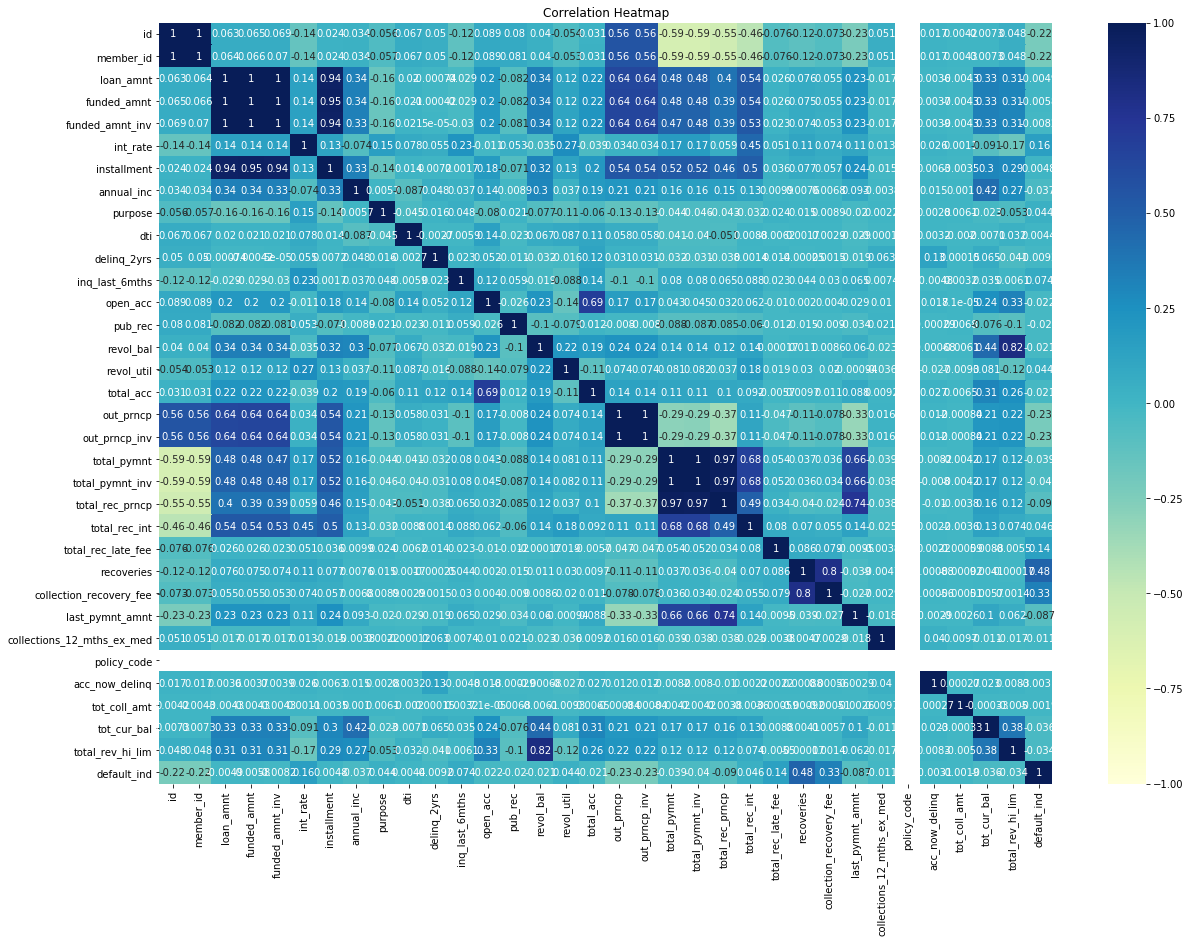

In [13]:
#heat map for identifying multi-colinearit

corr_tab=original_data.corr()
fit,ax = plt.subplots(figsize=(20,14))
sns.heatmap(corr_tab,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
ax.set_ylim(len(corr_tab), 0.0)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
col_to_drop=['id', 'member_id',
        'emp_title','emp_length', 'verification_status',
        'pymnt_plan', 'title', 'addr_state',        
        'out_prncp_inv',
       'total_pymnt_inv',
       'total_rec_late_fee',
       'last_pymnt_amnt','last_credit_pull_d',
       'policy_code', 'application_type',
       'acc_now_delinq']

In [17]:
original_data.drop(columns=col_to_drop,inplace=True)

In [18]:
original_data.shape

(855969, 36)

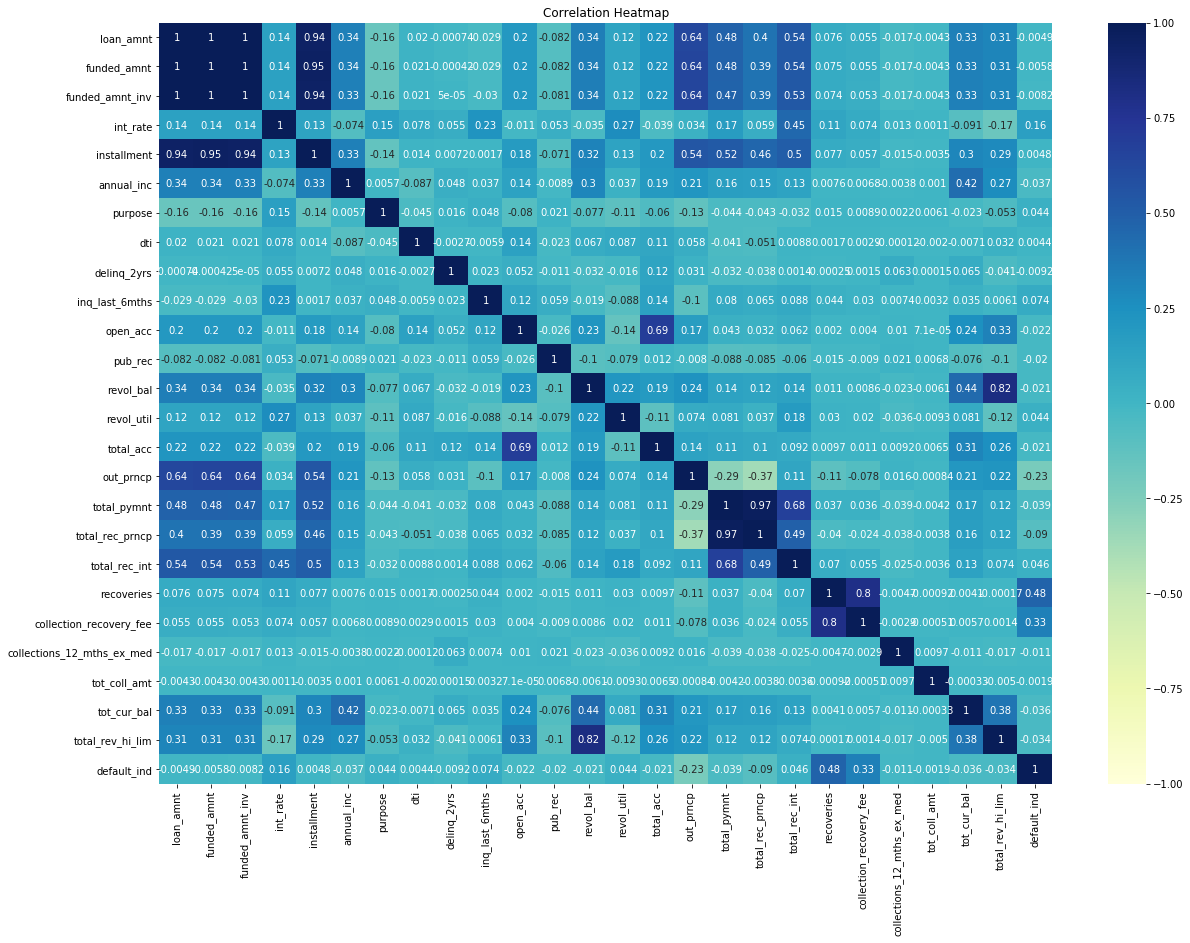

In [18]:
#heat map for identifying multi-colinearit

corr_tab=original_data.corr()
fit,ax = plt.subplots(figsize=(20,14))
sns.heatmap(corr_tab,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
ax.set_ylim(len(corr_tab), 0.0)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
original_data.shape

(855969, 36)

In [19]:
describe_original_data = original_data.describe(include='all').transpose()
describe_original_data["Null_Val"] = original_data.isnull().sum()
describe_original_data["Data_Type"] = original_data.dtypes
describe_original_data.sort_index().sort_values(by=["Data_Type"])

count unique         top    freq       mean  \
purpose                     855969    NaN         NaN     NaN    2.56231   
default_ind                 855969    NaN         NaN     NaN  0.0542858   
annual_inc                  855969    NaN         NaN     NaN    75071.2   
total_rec_prncp             855969    NaN         NaN     NaN    5850.84   
total_rec_int               855969    NaN         NaN     NaN    1755.05   
total_pymnt                 855969    NaN         NaN     NaN     7653.3   
total_acc                   855969    NaN         NaN     NaN    25.2693   
tot_cur_bal                 788656    NaN         NaN     NaN     139766   
tot_coll_amt                788656    NaN         NaN     NaN    225.413   
revol_util                  855523    NaN         NaN     NaN    55.0194   
revol_bal                   855969    NaN         NaN     NaN    16910.5   
recoveries                  855969    NaN         NaN     NaN    47.0895   
pub_rec                     855969    NaN         NaN     NaN   0.194537   
out_prncp                   855969    NaN         NaN     NaN    8284.83   
open_acc                    855969    NaN         NaN     NaN    11.5424   
total_rev_hi_lim            788656    NaN         NaN     NaN    32163.6   
loan_amnt                   855969    NaN         NaN     NaN    14745.6   
collection_recovery_fee     855969    NaN         NaN     NaN    4.95123   
int_rate                    855969    NaN         NaN     NaN    13.1923   
installment                 855969    NaN         NaN     NaN    436.238   
inq_last_6mths              855969    NaN         NaN     NaN   0.680915   
collections_12_mths_ex_med  855913    NaN         NaN     NaN  0.0142304   
delinq_2yrs                 855969    NaN         NaN     NaN   0.311621   
dti                         855969    NaN         NaN     NaN    18.1222   
funded_amnt_inv             855969    NaN         NaN     NaN    14700.1   
funded_amnt                 855969    NaN         NaN     NaN    14732.4   
issue_d                     855969    103    Oct-2015   48212        NaN   
earliest_cr_line            855969    697    Aug-2001    6433        NaN   
sub_grade                   855969     35          B3   54958        NaN   
last_pymnt_d                847107     97    Jan-2016  467510        NaN   
grade                       855969      7           B  247998        NaN   
home_ownership              855969      6    MORTGAGE  429106        NaN   
initial_list_status         855969      2           f  442555        NaN   
next_pymnt_d                602998      3    Feb-2016  534094        NaN   
term                        855969      2   36 months  600221        NaN   
zip_code                    855969    931       945xx    9466        NaN   

                                 std    min      25%      50%      75%  \
purpose                      2.27134      0        2        2        2   
default_ind                 0.226581      0        0        0        0   
annual_inc                   64264.5      0    45000    65000    90000   
total_rec_prncp              6676.41      0  1239.95  3286.89     8000   
total_rec_int                2081.69      0   451.27  1076.91  2233.98   
total_pymnt                  7909.38      0  1969.69  4976.16  10744.8   
total_acc                    11.8188      2       17       24       32   
tot_cur_bal                   153939      0    29870  81008.5   208703   
tot_coll_amt                 10489.4      0        0        0        0   
revol_util                   23.8116      0     37.6     55.9     73.5   
revol_bal                    22223.7      0     6469    11903    20857   
recoveries                   413.136      0        0        0        0   
pub_rec                     0.581585      0        0        0        0   
out_prncp                    8461.95      0        0  6290.25  13528.8   
open_acc                     5.30809      0        8       11       14   
total_rev_hi_lim             376

### Null Values Treatment

##### 1. Last Payment Date

In [21]:
# change to date time format

original_data['last_pymnt_d']=pd.to_datetime(original_data['last_pymnt_d'],infer_datetime_format=True)
original_data['next_pymnt_d']=pd.to_datetime(original_data['next_pymnt_d'],infer_datetime_format=True)

due_time = original_data['next_pymnt_d'] - original_data['last_pymnt_d']
original_data['due_time'] = due_time.dt.days 

In [22]:
original_data['last_pymnt_d'].dtypes

dtype('<M8[ns]')

In [23]:
original_data.drop(columns=['next_pymnt_d','last_pymnt_d'],inplace=True)

In [ ]:
original_data.due_time.isnull().sum()

In [ ]:
original_data.due_time.replace(np.nan,0,inplace=True)

##### 2. revol_util

In [24]:
original_data["revol_util"]=original_data['revol_util'].replace(np.nan,original_data['revol_util'].median())

In [25]:
original_data['revol_util'].isnull().sum()

0

##### 3.tot_cur_bal

In [26]:
#null value treatment
tot_cur_bal_med=original_data.tot_cur_bal.median()

In [27]:
original_data.tot_cur_bal.replace(np.nan,tot_cur_bal_med,inplace=True)

##### 4.total_rev_hi_lim

In [29]:
#null value treatment
total_rev_hi_lim_med=original_data.total_rev_hi_lim.median()

In [30]:
original_data.total_rev_hi_lim.replace(np.nan,total_rev_hi_lim_med,inplace=True)

### Convert Data to Numeric

In [ ]:
data=original_data.copy()

In [ ]:
#taking ratio of how much loan was requested by the applicant and how much loan was issued
data['loan_to_funded_amnt']=data['loan_amnt']/data['funded_amnt']

#taking ratio of loan amount contributed by investors to total loan amount issued
data['inv_amnt_to_tot_amnt']=data['funded_amnt_inv']/data['funded_amnt']


In [ ]:
# converting 'issue_d' and 'earliest_cr_line' to datetime format
data['issue_d'] = pd.to_datetime(data['issue_d'],infer_datetime_format=True)
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'],infer_datetime_format=True)

#create new var for "credit history"
credit_hist = data['issue_d'] - data['earliest_cr_line']
data['credit_hist'] = credit_hist.dt.days   

In [ ]:
 # credit_line_ratio 
data['credit_line_ratio']=data['open_acc']/data['total_acc']

In [ ]:
term_to_int = {' 36 months': 1,
                   ' 60 months': 2}
  #term of loan
grade_to_int = dict(zip(['A', 'B', 'C', 'D', 'E', 'F', 'G'], np.arange(7, 0, -1)))
   #grade of loan application form

    #copied from above, we can write a function to generate this dict
sub_grade_sorted = {'G5': 0, 'G4': 1, 'G3': 2, 'G2': 3, 'G1': 4,
                        'F5': 5, 'F4': 6, 'F3': 7, 'F2': 8, 'F1': 9,
                        'E5': 10, 'E4': 11, 'E3': 12, 'E2': 13, 'E1': 14,
                        'D5': 15, 'D4': 16, 'D3': 17, 'D2': 18, 'D1': 19,
                        'C5': 20, 'C4': 21, 'C3': 22, 'C2': 23, 'C1': 24,
                        'B5': 25, 'B4': 26, 'B3': 27, 'B2': 28, 'B1': 29,
                        'A5': 30, 'A4': 31, 'A3': 32, 'A2': 33, 'A1': 34} 

home_to_int = {'MORTGAGE': 4, 'RENT': 3, 'OWN': 5,'ANY': 2,'OTHER': 1, 'NONE':0 }
    #home ownership 
    
data['zip_code'] = data['zip_code'].str.replace('x','')
    #this will convert 5 valued zip to 3 digit zip deleting "xx"
data['zip_2'] = data['zip_code'].str[:2]
    #this will make an additional column of zip with only first 2 digits

list_stat = {'f': 1, 'w': 0}
    # initial_list_status
    
    #in place replacements
data.replace({'term': term_to_int, 'grade':grade_to_int,'sub_grade': sub_grade_sorted,
                            'home_ownership':home_to_int,'initial_list_status':list_stat}, inplace=True)

In [ ]:
#Balance_annual_income
data['balance_annual_inc'] = (data['funded_amnt']/(data["term"]/12)) / (data['annual_inc']+1)

# inst_amnt_ratio  
data['inst_amnt_ratio']=data['installment']/data['funded_amnt']

In [ ]:
data.drop(columns=['earliest_cr_line','open_acc','total_acc','installment','funded_amnt','funded_amnt_inv',
                  'loan_amnt','tot_coll_amt','collections_12_mths_ex_med'],inplace=True)

In [ ]:
data.drop(columns="zip_code",inplace=True)

In [ ]:
describe_data = data.describe(include='all').transpose()
describe_data["Null_Val"] = data.isnull().sum()
describe_data["Data_Type"] = data.dtypes
describe_data.sort_index().sort_values(by=["Data_Type"])

## Splitting the data into Train and Test data

In [ ]:
"""Splitting the data into train and test is extremely crucial before we enter into data pre-processing stage.
It is so because, doing the splitting now will eleminate the risk of data leakage.
Data leakage can cause the prediction model to generate results that would be 'too good to be true'.
To avoid the risk and later consequences of data leakage, splitting has to be performed before we start 
working on the data """

# Splitting the data into trian and test based on datetime

#individual_group['issue_d']=pd.to_datetime(individual_group['issue_d'],infer_datetime_format=True)

split_date=pd.datetime(2015,5,1)

train_data=data.loc[data['issue_d']<=split_date]
test_data=data.loc[data['issue_d']>split_date]

print(train_data.shape)
print(test_data.shape)

In [ ]:
train_data.drop(columns="issue_d",inplace=True)
test_data.drop(columns="issue_d",inplace=True)

In [ ]:
#save as
train_data.to_csv('train_data_custom_0101_c.csv')
test_data.to_csv('test_data_custom_0101_c.csv')

In [ ]:
train_data.shape,test_data.shape

### Treating the Outliers of Train Data

In [20]:
def box_hist_plot(df,col):
    
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)})

    # Add a graph in each part
    sns.boxplot(x=df[col], ax=ax_box)
    sns.histplot(data=df[col], ax=ax_hist,kde=True)
 
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()

##### revol_util

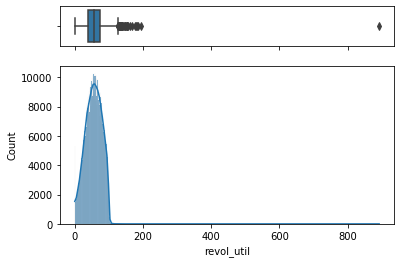

In [37]:
box_hist_plot(train_data,'revol_util')

In [46]:
revol_util_q=train_data['revol_util'].quantile(0.998)
train_data=train_data[train_data['revol_util']<revol_util_q]

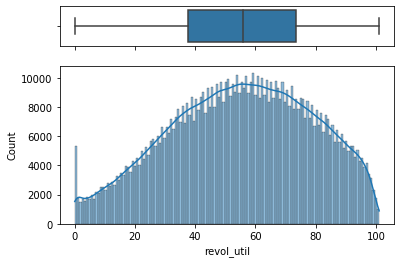

In [39]:
box_hist_plot(train_data,'revol_util')

##### tot_cur_bal

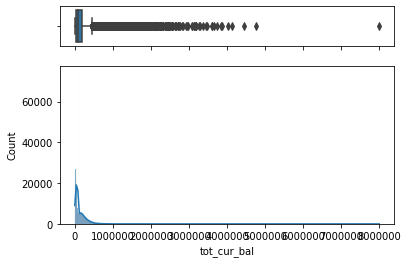

In [44]:
box_hist_plot(train_data,'tot_cur_bal')

In [47]:
tot_cur_bal_q=train_data.tot_cur_bal.quantile(0.995)
train_data=train_data[train_data.tot_cur_bal<tot_cur_bal_q]

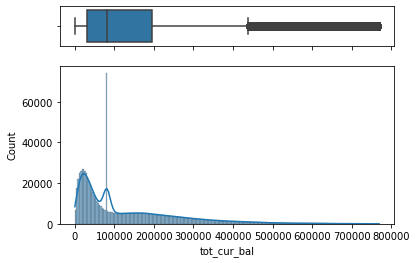

In [46]:
box_hist_plot(train_data,'tot_cur_bal')

##### total_rev_hi_lim

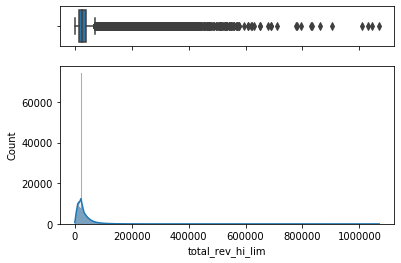

In [37]:
box_hist_plot(train_data,'total_rev_hi_lim')

In [48]:
#outlier treatment
total_rev_hi_lim_q=train_data['total_rev_hi_lim'].quantile(0.995)
train_data=train_data[train_data['total_rev_hi_lim']<total_rev_hi_lim_q]  

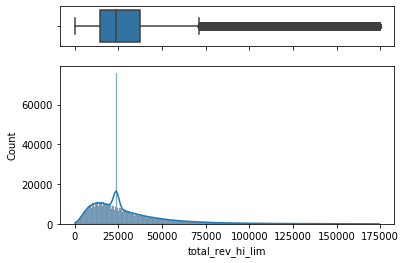

In [39]:
box_hist_plot(train_data,'total_rev_hi_lim')

##### revol_bal

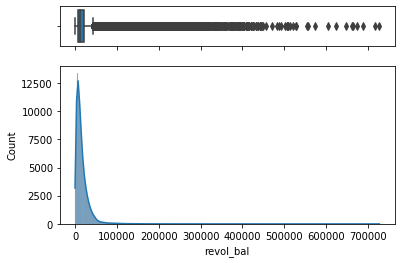

In [60]:
box_hist_plot(train_data,"revol_bal")

In [49]:
#outlier treatment
revol_bal_q=train_data['revol_bal'].quantile(0.995)
train_data=train_data[train_data['revol_bal']<revol_bal_q]

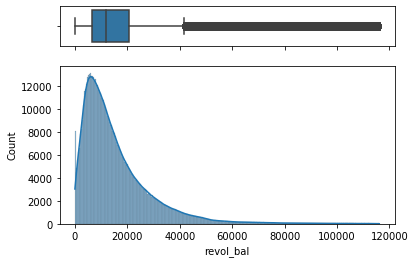

In [62]:
box_hist_plot(train_data,'revol_bal')

##### annual_inc

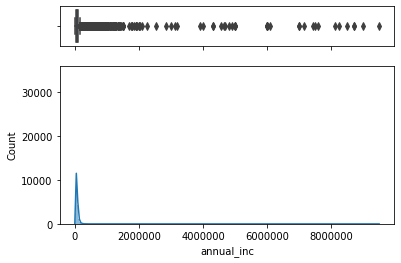

In [63]:
box_hist_plot(train_data,'annual_inc')

In [50]:
#outlier treatment
annual_inc_q=train_data['annual_inc'].quantile(0.993)
train_data=train_data[train_data['annual_inc']<annual_inc_q]

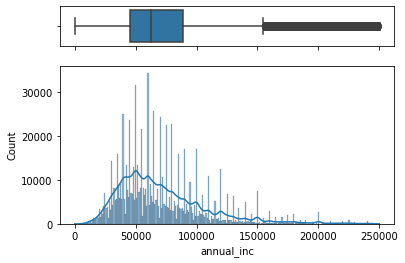

In [65]:
box_hist_plot(train_data,'annual_inc')

##### dti

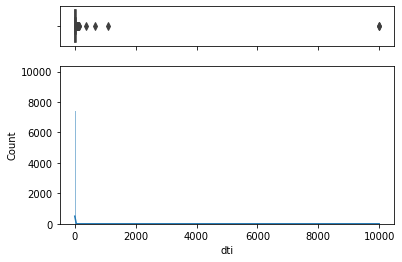

In [66]:
box_hist_plot(train_data,"dti")

In [51]:
#outlier treatment
dti_q=train_data['dti'].quantile(0.997)
train_data=train_data[train_data['dti']<dti_q]

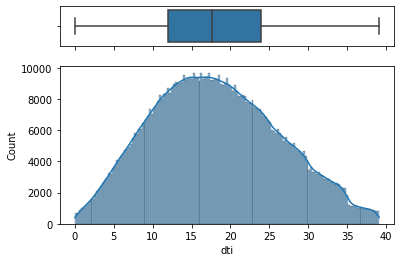

In [68]:
box_hist_plot(train_data,"dti")

##### collection_recovery_fee

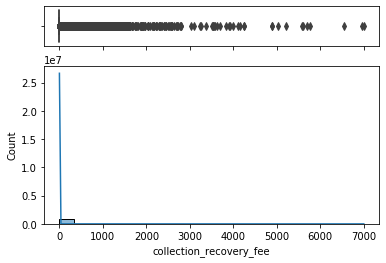

In [69]:
box_hist_plot(train_data,"collection_recovery_fee")

In [52]:
#outlier treatment
collection_q=train_data['collection_recovery_fee'].quantile(0.996)
train_data=train_data[train_data['collection_recovery_fee']<collection_q]

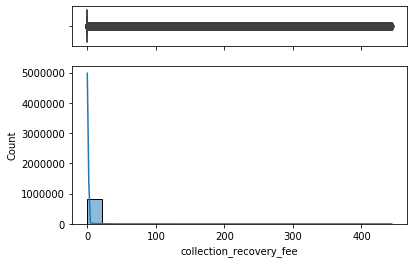

In [71]:
box_hist_plot(train_data,"collection_recovery_fee")

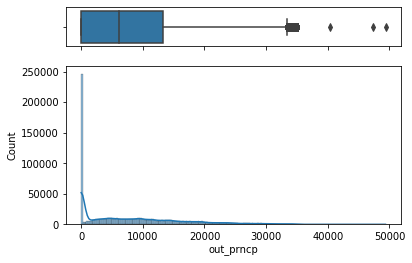

In [73]:
box_hist_plot(train_data,"out_prncp")

In [53]:
#outlier treatment
out_prncp_q=train_data['out_prncp'].quantile(0.998)
train_data=train_data[train_data['out_prncp']<out_prncp_q]

#### total_rec_int

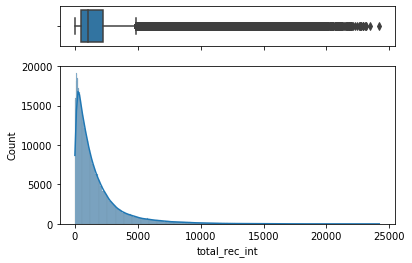

In [46]:
box_hist_plot(train_data,"total_rec_int")

In [54]:
#outlier treatment
total_rec_int_q=train_data['total_rec_int'].quantile(0.997)
train_data=train_data[train_data['total_rec_int']<total_rec_int_q]

In [ ]:
box_hist_plot(train_data,"total_rec_int")

##### total_pymnt

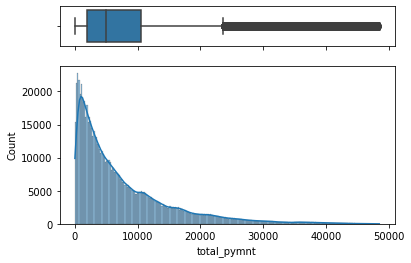

In [49]:
box_hist_plot(train_data,"total_pymnt")

In [55]:
#outlier treatment
total_pymnt_q=train_data['total_pymnt'].quantile(0.997)
train_data=train_data[train_data['total_pymnt']<total_pymnt_q]

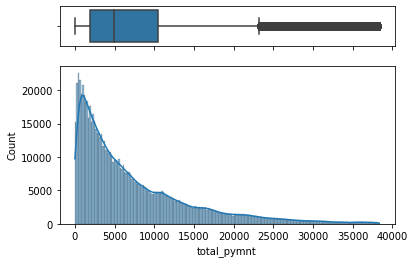

In [53]:
box_hist_plot(train_data,"total_pymnt")

In [74]:
train_data['default_ind'].value_counts()

0    531665
1     42017
Name: default_ind, dtype: int64

In [75]:
test_data['default_ind'].value_counts()

0    245844
1       301
Name: default_ind, dtype: int64